# Smartdarts: Automated Dart Scoring With Computer Vision on Portable Camera

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Getting the Helper Functions

In [ ]:
from Smartdarts_Helping_Functions import display, crop_image, extracting_roi, transformation, apply_wavelet_denoising, preprocess, Difference, Remove_noise, Get_locations, calculate_dart_score, transform_single_point, read_images_and_scores
import cv2
import numpy as np
import os

## 2. Importing the dataset

The dataset contains the images of 45 degree, 60_degree and 90 degree.  

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Rename Dataset.zip'

extract_path = '.'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified path
    zip_ref.extractall(extract_path)

print("Extraction completed successfully.")


Extraction completed successfully.


## 3. 60 Degree Score calculation

Each angle has 120 images with darts and one Background Image without darts on it. The image name is imagenumber_score.JPG i.e. 1_34.JPG, 2_7.JPG so on.

### 3.1. Reading the Images Path and Scores

In [ ]:
folder_path_60 = '/content/Rename Dataset/60 degree'
images_60, scores_60, background_image_60  = read_images_and_scores(folder_path_60)

### 3.2. Dart Detection

In [ ]:
x1, y1, x2, y2 = 1661, 508, 2699, 1756
background_image  = cv2.imread(background_image_60)
# background_image = cv2.cvtColor(background_image_60, cv2.COLOR_BGR2GRAY)
background_image = preprocess(background_image, x1, y1, x2, y2)
_, score_contour = extracting_roi(background_image)

In [ ]:
image_files = images_60

# Initialize an empty list to store coordinates
coordinates_list = []

for image_file in image_files:
    img = cv2.imread(image_file)
    forground_image = preprocess(img, x1, y1, x2, y2)
    # Process the image as needed
    diff = Difference(background_image, forground_image)
    diff = Remove_noise(diff)
    result_img, diff_thresh, locations = Get_locations(diff, forground_image, score_contour)

    # Display the image (optional)
    # Append coordinates to the list
    coordinates_list.append(locations)
    print(image_file, locations)

/content/Rename Dataset/60 degree/1_2.JPG [[612, 727]]
/content/Rename Dataset/60 degree/2_4.JPG [[612, 727]]
/content/Rename Dataset/60 degree/3_9.JPG [[612, 727], [500, 569]]
/content/Rename Dataset/60 degree/4_19.JPG [[527, 765]]
/content/Rename Dataset/60 degree/5_6.JPG [[527, 765], [835, 723]]
/content/Rename Dataset/60 degree/6_2.JPG [[527, 765], [835, 724]]
/content/Rename Dataset/60 degree/7_17.JPG [[609, 852]]
/content/Rename Dataset/60 degree/8_13.JPG [[609, 852]]
/content/Rename Dataset/60 degree/9_14.JPG [[609, 852], [435, 542]]
/content/Rename Dataset/60 degree/10_18.JPG []
/content/Rename Dataset/60 degree/11_1.JPG [[616, 551]]
/content/Rename Dataset/60 degree/12_3.JPG [[552, 861], [615, 551]]
/content/Rename Dataset/60 degree/13_18.JPG [[637, 588]]
/content/Rename Dataset/60 degree/14_0.JPG [[637, 589]]
/content/Rename Dataset/60 degree/15_7.JPG [[516, 715], [635, 586]]
/content/Rename Dataset/60 degree/16_17.JPG [[614, 866]]
/content/Rename Dataset/60 degree/17_20.JPG 

In [ ]:
coordinates_list

[[[612, 727]],
 [[612, 727]],
 [[612, 727], [500, 569]],
 [[527, 765]],
 [[527, 765], [835, 723]],
 [[527, 765], [835, 724]],
 [[609, 852]],
 [[609, 852]],
 [[609, 852], [435, 542]],
 [],
 [[616, 551]],
 [[552, 861], [615, 551]],
 [[637, 588]],
 [[637, 589]],
 [[516, 715], [635, 586]],
 [[614, 866]],
 [[747, 810], [613, 866]],
 [[747, 810], [613, 866], [520, 366]],
 [[652, 695]],
 [[647, 695], [468, 756]],
 [[558, 817], [468, 757]],
 [[657, 842]],
 [[563, 776]],
 [[563, 776], [703, 528]],
 [[659, 809]],
 [[659, 809], [617, 405]],
 [[659, 809], [475, 706], [616, 405]],
 [[621, 887]],
 [[611, 1036],
  [476, 906],
  [549, 695],
  [257, 619],
  [729, 1023],
  [865, 682],
  [522, 616],
  [356, 532],
  [712, 375],
  [634, 404],
  [474, 394]],
 [[621, 887], [571, 850], [727, 504]],
 [[656, 541]],
 [[481, 602], [668, 547]],
 [[565, 977], [478, 584], [669, 550]],
 [[735, 610]],
 [[800, 738], [735, 610]],
 [[801, 737], [735, 610], [318, 410]],
 [[587, 746]],
 [[588, 746], [642, 393]],
 [[300, 78

### 3.3 Background Transformation

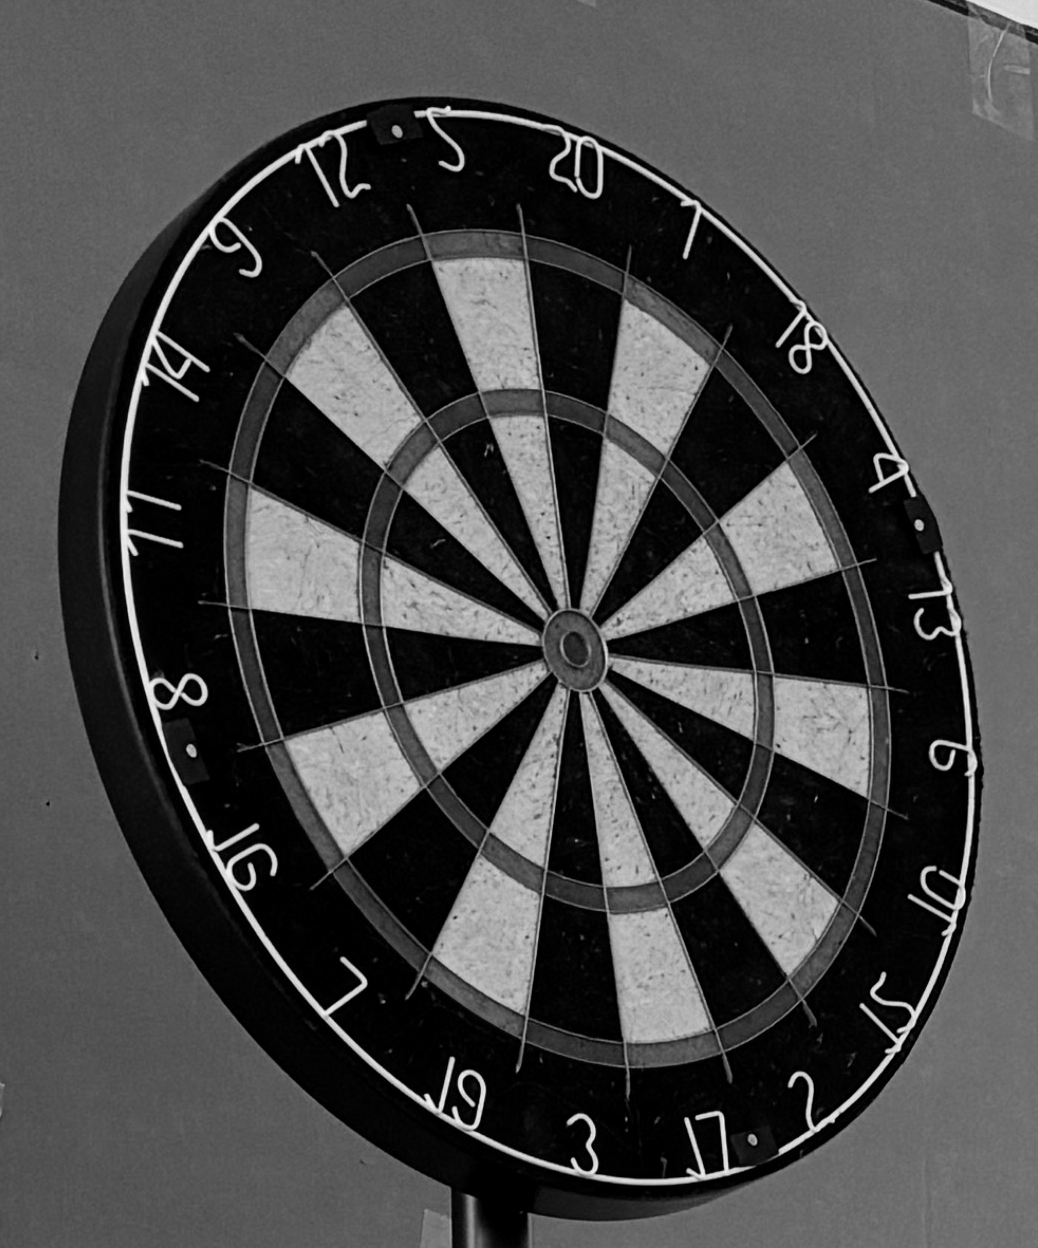

In [ ]:
# x1, y1, x2, y2 = 1661, 508, 2699, 1756
# background_image = crop_image(background_image, x1, y1, x2, y2)
display(background_image)

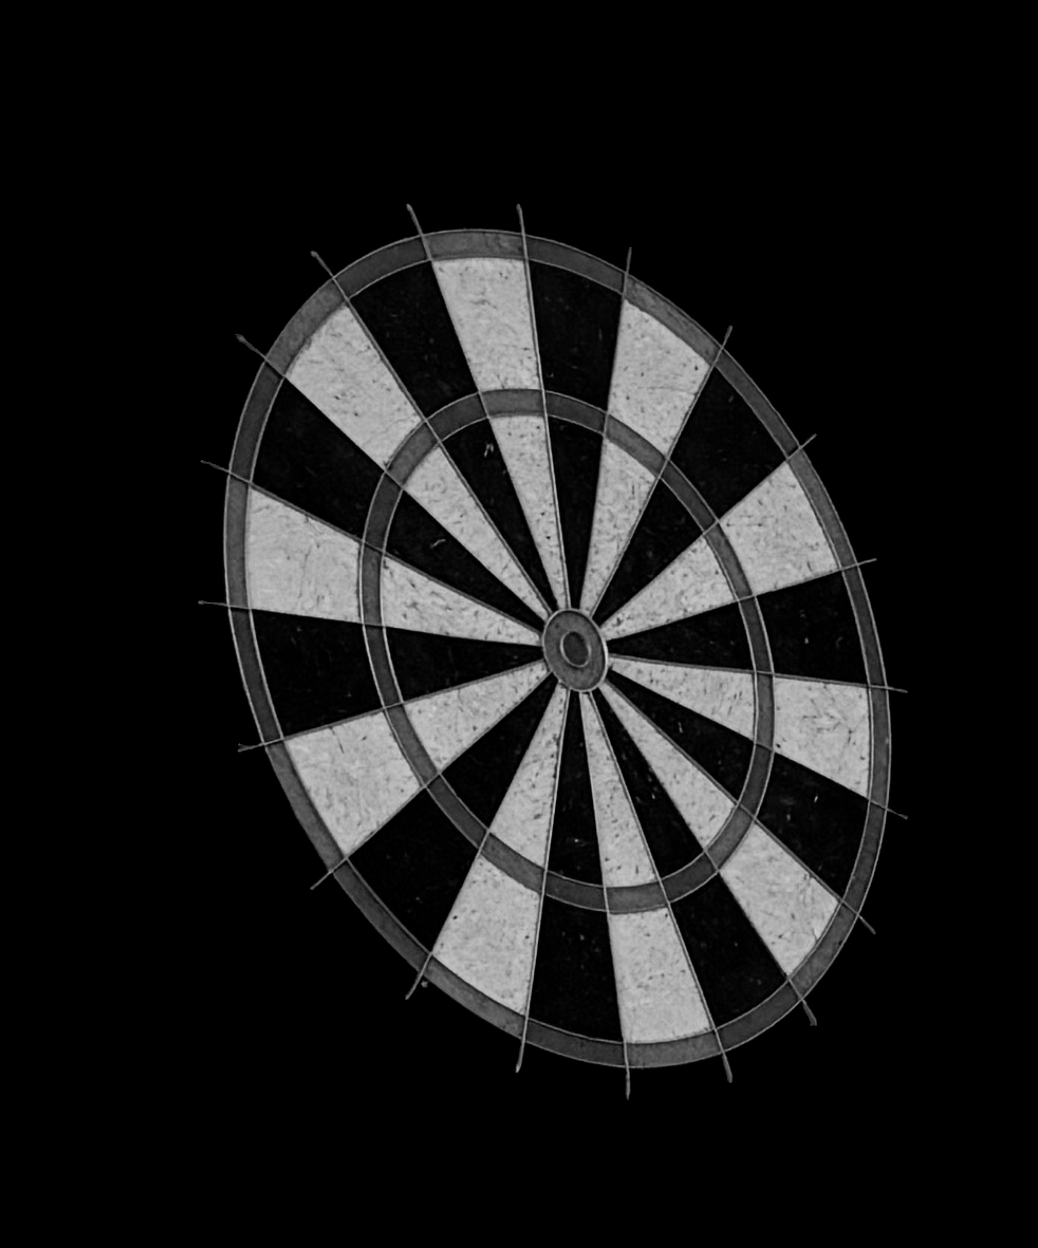

In [ ]:
isolated_dartboard, second_largest_contour = extracting_roi(background_image)
display(isolated_dartboard)

In [ ]:
dartboard_corners = [np.array([523, 232], dtype=np.int32),
                     np.array([887, 689], dtype=np.int32),
                     np.array([628, 1067], dtype=np.int32),
                     np.array([228, 606], dtype=np.int32)]


# isolated_dartboard = extracting_roi(background_image)
result = transformation(isolated_dartboard, dartboard_corners)

# Unpack the result
transformed_dartboard, transformed_corners, center_coordinates, radius, contours, M = result

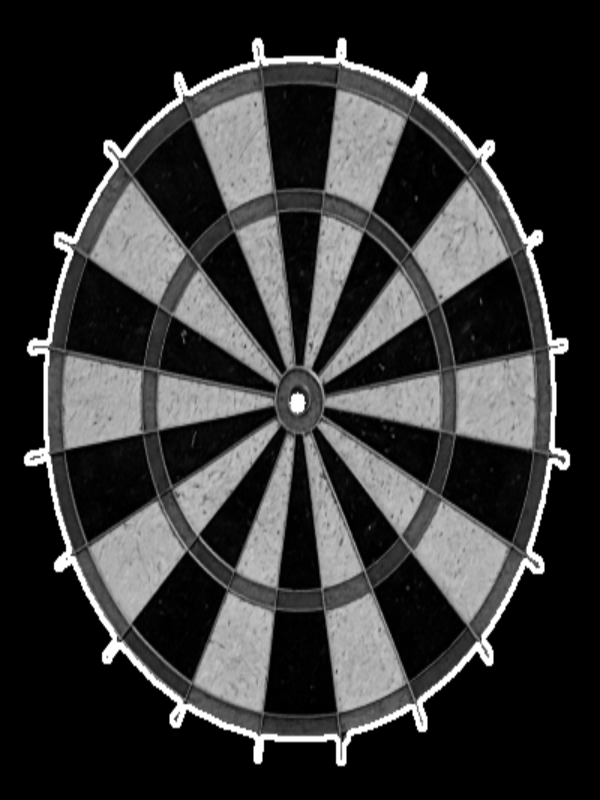

In [ ]:
# Draw the contours on a copy of the original image (so you don't modify the original)
contour_image = transformed_dartboard.copy()
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # -1 means draw all contours, (0, 255, 0) is the color, and 2 is the thickness
# Draw the center coordinate
cv2.circle(contour_image, center_coordinates, 5, (255, 0, 0), -1)  # Blue circle for the center
display(contour_image, frame_size=(600, 800))

### 3.4. Score Calculation

In [ ]:
transformed_coordinates_list_60 = []

for coordinates in coordinates_list:
    transformed_coordinates = []
    for point in coordinates:
        if point:  # Check if the point list is not empty
            transformed_point = transform_single_point(point, perspective_matrix=M)
            transformed_coordinates.append(transformed_point)
    transformed_coordinates_list_60.append(transformed_coordinates)

# Print the transformed coordinates
print("Transformed Coordinates:")
for idx, transformed_coordinates in enumerate(transformed_coordinates_list_60, start=1):
    print(f"Image {idx}: {transformed_coordinates}")


Transformed Coordinates:
Image 1: [(230.6584956122407, 210.78853514096147)]
Image 2: [(230.6584956122407, 210.78853514096147)]
Image 3: [(230.6584956122407, 210.78853514096147), (155.10772195226224, 202.90209860480547)]
Image 4: [(211.37126466639873, 257.47731050438216)]
Image 5: [(211.37126466639873, 257.47731050438216), (308.4129370867418, 115.21837658804617)]
Image 6: [(211.37126466639873, 257.47731050438216), (308.66587318651335, 115.57236201852278)]
Image 7: [(260.16078849018345, 254.21044254907022)]
Image 8: [(260.16078849018345, 254.21044254907022)]
Image 9: [(260.16078849018345, 254.21044254907022), (127.91876718631453, 219.79933234521027)]
Image 10: []
Image 11: [(188.74465602719772, 149.30301156276067)]
Image 12: [(242.92481410845403, 279.6579955881583), (188.4106111051212, 149.72134938300923)]
Image 13: [(204.93611322754205, 153.1555224050292)]
Image 14: [(205.1832256836898, 153.4977141308922)]
Image 15: [(195.65865104200148, 245.16938951962499), (203.76658070625737, 153.308

In [ ]:
for image_idx, image_coordinates in enumerate(transformed_coordinates_list_60, start=1):
    print(f"Image {image_idx}:")
    for dart_position in image_coordinates:
        dart_score = calculate_dart_score(dart_position, transformed_dartboard, transformed_corners, center_coordinates)
        print(f"Dart at position {dart_position} scores {dart_score}")


Image 1:
Dart at position (230.6584956122407, 210.78853514096147) scores 2
Image 2:
Dart at position (230.6584956122407, 210.78853514096147) scores 2
Image 3:
Dart at position (230.6584956122407, 210.78853514096147) scores 2
Dart at position (155.10772195226224, 202.90209860480547) scores 9
Image 4:
Dart at position (211.37126466639873, 257.47731050438216) scores 19
Image 5:
Dart at position (211.37126466639873, 257.47731050438216) scores 19
Dart at position (308.4129370867418, 115.21837658804617) scores 6
Image 6:
Dart at position (211.37126466639873, 257.47731050438216) scores 19
Dart at position (308.66587318651335, 115.57236201852278) scores 6
Image 7:
Dart at position (260.16078849018345, 254.21044254907022) scores 17
Image 8:
Dart at position (260.16078849018345, 254.21044254907022) scores 17
Image 9:
Dart at position (260.16078849018345, 254.21044254907022) scores 17
Dart at position (127.91876718631453, 219.79933234521027) scores 14
Image 10:
Image 11:
Dart at position (188.744

In [ ]:
image_scores_60 = []
for image_idx, image_coordinates in enumerate(transformed_coordinates_list_60, start=1):
    total_score = 0
    for dart_position in image_coordinates:
        dart_score = calculate_dart_score(dart_position, transformed_dartboard, transformed_corners, center_coordinates)
        total_score += dart_score
    image_scores_60.append(total_score)

# Print the final score for each image
for image_idx, score in enumerate(image_scores_60, start=1):
    print(f"Image {image_idx}: Total Score = {score}")


Image 1: Total Score = 2
Image 2: Total Score = 2
Image 3: Total Score = 11
Image 4: Total Score = 19
Image 5: Total Score = 25
Image 6: Total Score = 25
Image 7: Total Score = 17
Image 8: Total Score = 17
Image 9: Total Score = 31
Image 10: Total Score = 0
Image 11: Total Score = 1
Image 12: Total Score = 4
Image 13: Total Score = 18
Image 14: Total Score = 18
Image 15: Total Score = 25
Image 16: Total Score = 17
Image 17: Total Score = 37
Image 18: Total Score = 42
Image 19: Total Score = 10
Image 20: Total Score = 17
Image 21: Total Score = 10
Image 22: Total Score = 2
Image 23: Total Score = 3
Image 24: Total Score = 39
Image 25: Total Score = 2
Image 26: Total Score = 3
Image 27: Total Score = 19
Image 28: Total Score = 34
Image 29: Total Score = 139
Image 30: Total Score = 55
Image 31: Total Score = 18
Image 32: Total Score = 29
Image 33: Total Score = 35
Image 34: Total Score = 13
Image 35: Total Score = 19
Image 36: Total Score = 33
Image 37: Total Score = 17
Image 38: Total Sc

In [ ]:
def overall_compare_scores(predicted_scores, actual_scores):
    # Ensure both arrays are of the same length
    if len(predicted_scores) != len(actual_scores):
        return "Arrays must be of the same length"

    # Count the number of matching scores
    num_matches = sum(1 for pred, actual in zip(predicted_scores, actual_scores) if pred == actual)

    # Calculate the percentage of matching scores
    total_scores = len(predicted_scores)
    percentage_matches = (num_matches / total_scores) * 100

    return percentage_matches


In [ ]:
num_matches_60 = overall_compare_scores(predicted_scores=image_scores_60, actual_scores=scores_60)
print("Number of matching scores:", num_matches_60)

Number of matching scores: 31.62393162393162


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_scores(predicted_scores, actual_scores):
    # Plotting the predicted scores
    plt.plot(predicted_scores, label='Predicted Scores', marker='o')

    # Plotting the actual scores
    plt.plot(actual_scores, label='Actual Scores', marker='x')

    # Adding labels and title
    plt.xlabel('Throw Number')
    plt.ylabel('Score')
    plt.title('Comparison of Predicted and Actual Scores for 60 Degree')

    # Adding legend
    plt.legend()

    # Show plot
    plt.show()

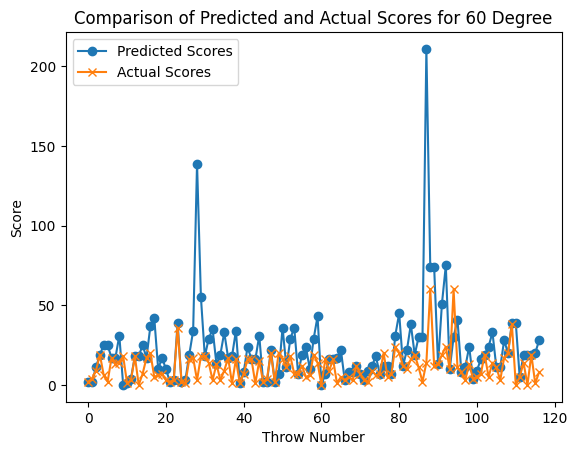

In [ ]:
plot_scores(predicted_scores=image_scores_60, actual_scores=scores_60)


In [ ]:
def compare_scores(predicted_scores, actual_scores):
    # Ensure both arrays are of the same length
    if len(predicted_scores) != len(actual_scores):
        return "Arrays must be of the same length"

    # Initialize variables to store counts and total scores for each type of dart
    single_dart_matches = 0
    double_dart_matches = 0
    triple_dart_matches = 0
    total_single_darts = 0
    total_double_darts = 0
    total_triple_darts = 0

    # Iterate through the scores in groups of three
    for i in range(0, len(predicted_scores), 3):
        pred_single, pred_double, pred_triple = predicted_scores[i:i+3]
        actual_single, actual_double, actual_triple = actual_scores[i:i+3]

        if pred_single == actual_single:
            single_dart_matches += 1
        if pred_double == actual_double:
            double_dart_matches += 1
        if pred_triple == actual_triple:
            triple_dart_matches += 1

        total_single_darts += 1
        total_double_darts += 1
        total_triple_darts += 1

    # Calculate the percentage of matching scores for each type of dart
    single_dart_percentage = (single_dart_matches / total_single_darts) * 100
    double_dart_percentage = (double_dart_matches / total_double_darts) * 100
    triple_dart_percentage = (triple_dart_matches / total_triple_darts) * 100

    return single_dart_percentage, double_dart_percentage, triple_dart_percentage

In [ ]:
single_percentage_60, double_percentage_60, triple_percentage_60 = compare_scores(predicted_scores= image_scores_60, actual_scores=scores_60)
print("Percentage of matching single dart scores:", single_percentage_60, "%")
print("Percentage of matching double dart scores:", double_percentage_60, "%")
print("Percentage of matching triple dart scores:", triple_percentage_60, "%")

Percentage of matching single dart scores: 84.61538461538461 %
Percentage of matching double dart scores: 7.6923076923076925 %
Percentage of matching triple dart scores: 2.564102564102564 %


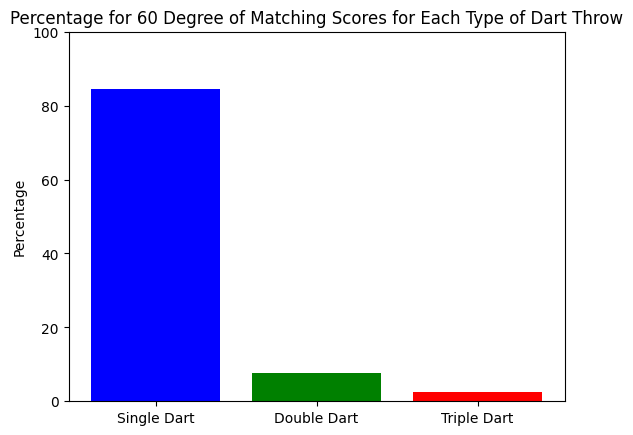

In [ ]:
# Plotting
labels = ['Single Dart', 'Double Dart', 'Triple Dart']
percentages = [single_percentage_60, double_percentage_60, triple_percentage_60]

plt.bar(labels, percentages, color=['blue', 'green', 'red'])
plt.title('Percentage for 60 Degree of Matching Scores for Each Type of Dart Throw')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

## 4. 45 Degree Score Calculation

### 4.1. Reading the Images Path and Scores

In [ ]:
folder_path_45 = '/content/Rename Dataset/45 degree'
images_45, scores_45, background_image_45  = read_images_and_scores(folder_path_45)

### 4.2. Dart Detection

In [ ]:
x1, y1, x2, y2 = 1641, 302, 2513, 1626
background_image  = cv2.imread(background_image_45)
# background_image = cv2.cvtColor(background_image_60, cv2.COLOR_BGR2GRAY)
background_image = preprocess(background_image, x1, y1, x2, y2)
_, score_contour = extracting_roi(background_image)

In [ ]:
image_files = images_45

# Initialize an empty list to store coordinates
coordinates_list_45 = []

for image_file in image_files:
    img = cv2.imread(image_file)
    forground_image = preprocess(img, x1, y1, x2, y2)
    # Process the image as needed
    diff = Difference(background_image, forground_image)
    diff = Remove_noise(diff)
    result_img, diff_thresh, locations = Get_locations(diff, forground_image, score_contour)

    # Display the image (optional)
    # Append coordinates to the list
    coordinates_list_45.append(locations)
    print(image_file, locations)

/content/Rename Dataset/45 degree/1_10.JPG [[695, 665], [710, 673]]
/content/Rename Dataset/45 degree/2_13.JPG [[551, 755]]
/content/Rename Dataset/45 degree/3_8.JPG [[557, 758], [385, 705]]
/content/Rename Dataset/45 degree/4_13.JPG [[586, 722]]
/content/Rename Dataset/45 degree/5_18.JPG [[585, 722], [628, 567]]
/content/Rename Dataset/45 degree/6_20.JPG [[491, 959], [254, 602], [345, 521], [409, 419]]
/content/Rename Dataset/45 degree/7_1.JPG [[531, 1088], [602, 956], [714, 967], [354, 934], [255, 603], [344, 532], [488, 288], [412, 417]]
/content/Rename Dataset/45 degree/8_1.JPG [[655, 528], [662, 525], [576, 468]]
/content/Rename Dataset/45 degree/9_19.JPG [[426, 984], [655, 528], [662, 525], [576, 468]]
/content/Rename Dataset/45 degree/10_4.JPG [[640, 640]]
/content/Rename Dataset/45 degree/11_15.JPG []
/content/Rename Dataset/45 degree/12_1.JPG [[526, 585]]
/content/Rename Dataset/45 degree/13_8.JPG [[618, 616]]
/content/Rename Dataset/45 degree/14_3.JPG [[619, 618], [444, 328]]

In [ ]:
coordinates_list_45

[[[695, 665], [710, 673]],
 [[551, 755]],
 [[557, 758], [385, 705]],
 [[586, 722]],
 [[585, 722], [628, 567]],
 [[491, 959], [254, 602], [345, 521], [409, 419]],
 [[531, 1088],
  [602, 956],
  [714, 967],
  [354, 934],
  [255, 603],
  [344, 532],
  [488, 288],
  [412, 417]],
 [[655, 528], [662, 525], [576, 468]],
 [[426, 984], [655, 528], [662, 525], [576, 468]],
 [[640, 640]],
 [],
 [[526, 585]],
 [[618, 616]],
 [[619, 618], [444, 328]],
 [[447, 727], [444, 328]],
 [[506, 1076]],
 [[506, 1076], [541, 674]],
 [[506, 1076], [541, 674], [508, 541]],
 [],
 [[449, 725]],
 [[406, 776]],
 [[470, 819]],
 [[421, 988], [470, 819]],
 [[421, 988], [470, 819]],
 [[610, 589]],
 [[610, 589], [534, 527]],
 [[610, 589], [425, 574]],
 [[556, 702]],
 [[557, 702]],
 [[561, 610], [555, 703]],
 [[416, 465]],
 [[454, 924], [420, 464]],
 [[453, 923], [420, 461]],
 [[555, 699]],
 [[443, 875]],
 [[443, 875], [430, 620]],
 [[485, 547]],
 [[485, 548]],
 [[605, 753]],
 [[453, 696]],
 [[443, 702]],
 [[443, 702]],


### 4.3 Background Transformation

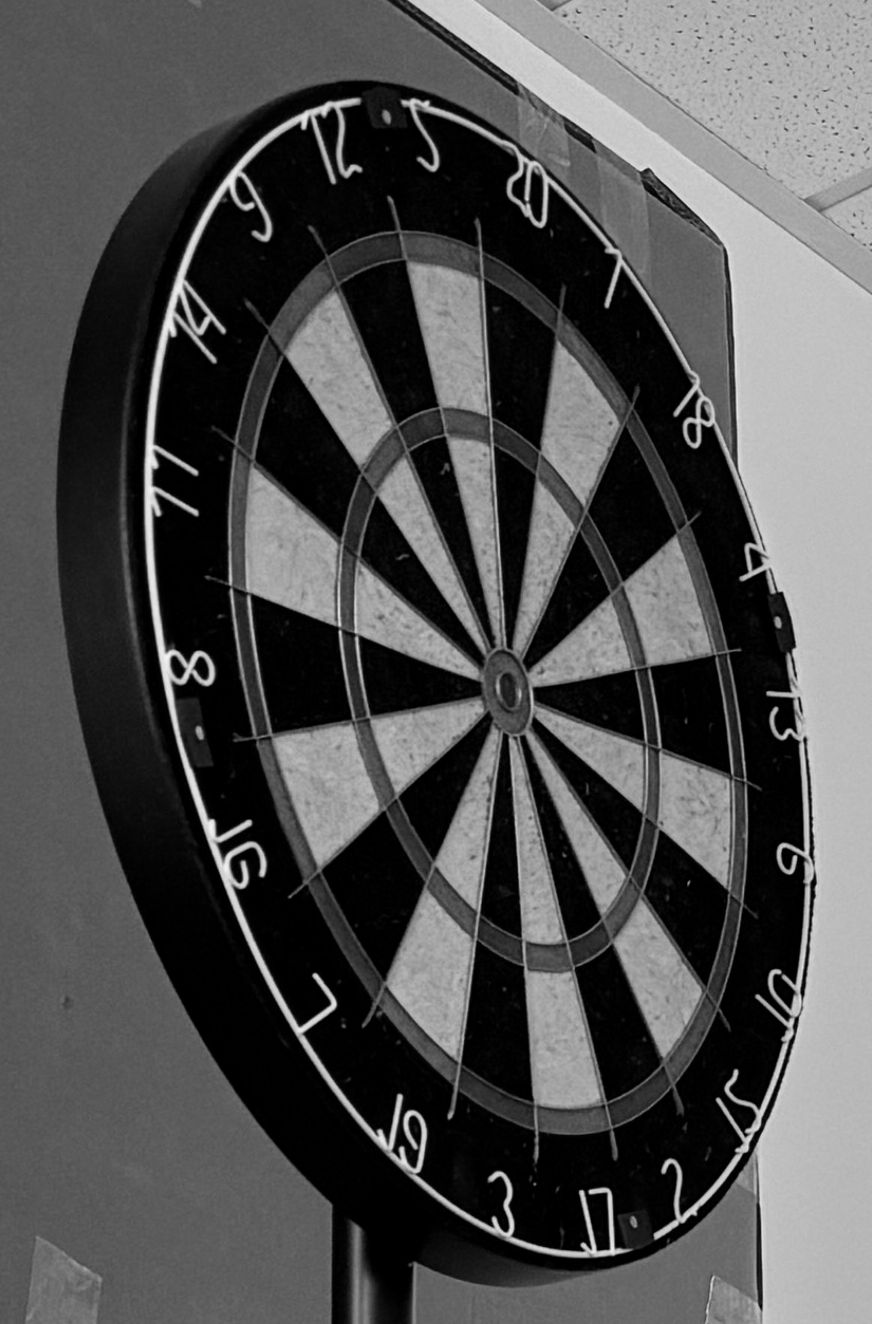

In [ ]:
display(background_image)

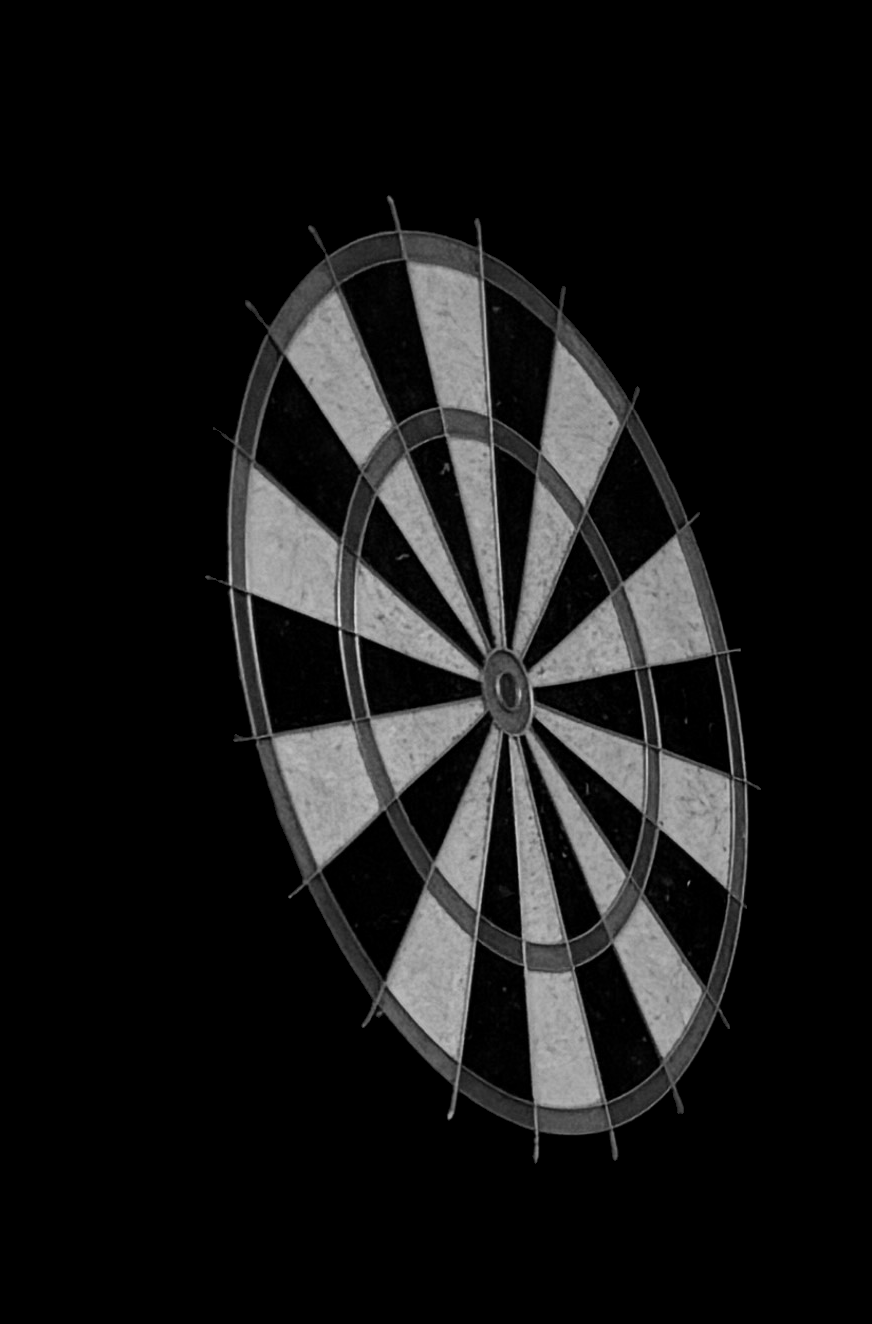

In [ ]:
isolated_dartboard, second_largest_contour = extracting_roi(background_image)
display(isolated_dartboard)

In [ ]:
dartboard_corners_45 = [np.array([480, 250], dtype=np.int32),
                     np.array([747, 782], dtype=np.int32),
                     np.array([537, 1129], dtype=np.int32),
                     np.array([228, 584], dtype=np.int32)]


# isolated_dartboard = extracting_roi(background_image)
result = transformation(isolated_dartboard, dartboard_corners_45)

# Unpack the result
transformed_dartboard, transformed_corners, center_coordinates, radius, contours, M = result

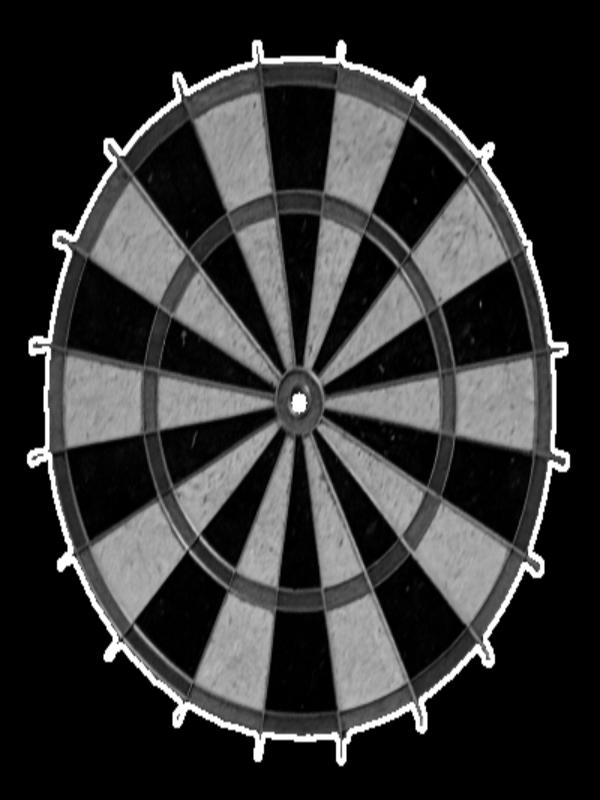

In [ ]:
# Draw the contours on a copy of the original image (so you don't modify the original)
contour_image = transformed_dartboard.copy()
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # -1 means draw all contours, (0, 255, 0) is the color, and 2 is the thickness
# Draw the center coordinate
cv2.circle(contour_image, center_coordinates, 5, (255, 0, 0), -1)  # Blue circle for the center
display(contour_image, frame_size=(600, 800))

### 4.4. Score Calculation

In [ ]:
transformed_coordinates_list_45 = []

for coordinates in coordinates_list_45:
    transformed_coordinates = []
    for point in coordinates:
        if point:  # Check if the point list is not empty
            transformed_point = transform_single_point(point, perspective_matrix=M)
            transformed_coordinates.append(transformed_point)
    transformed_coordinates_list_45.append(transformed_coordinates)

# Print the transformed coordinates
print("Transformed Coordinates:")
for idx, transformed_coordinates in enumerate(transformed_coordinates_list_45, start=1):
    print(f"Image {idx}: {transformed_coordinates}")


Transformed Coordinates:
Image 1: [(265.7944150947604, 75.56781519354772), (274.1663719586911, 68.26387532820685)]
Image 2: [(231.4092969385585, 194.5742995900793)]
Image 3: [(234.47196482259372, 191.96554926641565), (158.9672584644233, 272.80135485196075)]
Image 4: [(236.6384023061555, 163.1743139390093)]
Image 5: [(236.2481499379649, 163.78227384223499), (213.34357821446966, 87.16433269548091)]
Image 6: [(258.9138178762524, 291.86556343699993), (92.11472061144796, 311.05585226627494), (101.8731342781815, 239.9796347105852), (98.17015431617111, 173.93038890791317)]
Image 7: [(306.4253596984897, 309.608495935471), (302.3930563304125, 227.96072220497865), (353.2905238464664, 163.2019240891846), (202.54428502271216, 356.3974704988473), (92.65532953675782, 310.83572867876245), (104.16090711552543, 243.75705527501114), (92.1088260435248, 86.85386075326916), (98.6674867894582, 171.60468998705875)]
Image 8: [(213.7825201307416, 56.8728009909974), (215.75497409798143, 51.25919477993267), (168

In [ ]:
for image_idx, image_coordinates in enumerate(transformed_coordinates_list_45, start=1):
    print(f"Image {image_idx}:")
    for dart_position in image_coordinates:
        dart_score = calculate_dart_score(dart_position, transformed_dartboard, transformed_corners, center_coordinates)
        print(f"Dart at position {dart_position} scores {dart_score}")


Image 1:
Dart at position (265.7944150947604, 75.56781519354772) scores 13
Dart at position (274.1663719586911, 68.26387532820685) scores 13
Image 2:
Dart at position (231.4092969385585, 194.5742995900793) scores 10
Image 3:
Dart at position (234.47196482259372, 191.96554926641565) scores 10
Dart at position (158.9672584644233, 272.80135485196075) scores 8
Image 4:
Dart at position (236.6384023061555, 163.1743139390093) scores 13
Image 5:
Dart at position (236.2481499379649, 163.78227384223499) scores 13
Dart at position (213.34357821446966, 87.16433269548091) scores 18
Image 6:
Dart at position (258.9138178762524, 291.86556343699993) scores 3
Dart at position (92.11472061144796, 311.05585226627494) scores 8
Dart at position (101.8731342781815, 239.9796347105852) scores 28
Dart at position (98.17015431617111, 173.93038890791317) scores 24
Image 7:
Dart at position (306.4253596984897, 309.608495935471) scores 17
Dart at position (302.3930563304125, 227.96072220497865) scores 2
Dart at p

In [ ]:
image_scores_45 = []
for image_idx, image_coordinates in enumerate(transformed_coordinates_list_45, start=1):
    total_score = 0
    for dart_position in image_coordinates:
        dart_score = calculate_dart_score(dart_position, transformed_dartboard, transformed_corners, center_coordinates)
        total_score += dart_score
    image_scores_45.append(total_score)

# Print the final score for each image
for image_idx, score in enumerate(image_scores_45, start=1):
    print(f"Image {image_idx}: Total Score = {score}")


Image 1: Total Score = 26
Image 2: Total Score = 10
Image 3: Total Score = 18
Image 4: Total Score = 13
Image 5: Total Score = 31
Image 6: Total Score = 63
Image 7: Total Score = 116
Image 8: Total Score = 37
Image 9: Total Score = 56
Image 10: Total Score = 8
Image 11: Total Score = 0
Image 12: Total Score = 1
Image 13: Total Score = 4
Image 14: Total Score = 9
Image 15: Total Score = 21
Image 16: Total Score = 3
Image 17: Total Score = 7
Image 18: Total Score = 27
Image 19: Total Score = 0
Image 20: Total Score = 16
Image 21: Total Score = 16
Image 22: Total Score = 19
Image 23: Total Score = 38
Image 24: Total Score = 38
Image 25: Total Score = 36
Image 26: Total Score = 37
Image 27: Total Score = 50
Image 28: Total Score = 13
Image 29: Total Score = 13
Image 30: Total Score = 31
Image 31: Total Score = 12
Image 32: Total Score = 31
Image 33: Total Score = 31
Image 34: Total Score = 13
Image 35: Total Score = 19
Image 36: Total Score = 33
Image 37: Total Score = 5
Image 38: Total Sc

In [ ]:
len(scores_45)

117

In [ ]:
num_matches = overall_compare_scores(predicted_scores=image_scores_45, actual_scores=scores_45)
print("Number of matching scores:", num_matches)

Number of matching scores: 32.47863247863248


In [ ]:
def plot_scores(predicted_scores, actual_scores):
    # Plotting the predicted scores
    plt.plot(predicted_scores, label='Predicted Scores', marker='o')

    # Plotting the actual scores
    plt.plot(actual_scores, label='Actual Scores', marker='x')

    # Adding labels and title
    plt.xlabel('Throw Number')
    plt.ylabel('Score')
    plt.title('Comparison of Predicted and Actual Scores for 45 Degree')

    # Adding legend
    plt.legend()

    # Show plot
    plt.show()

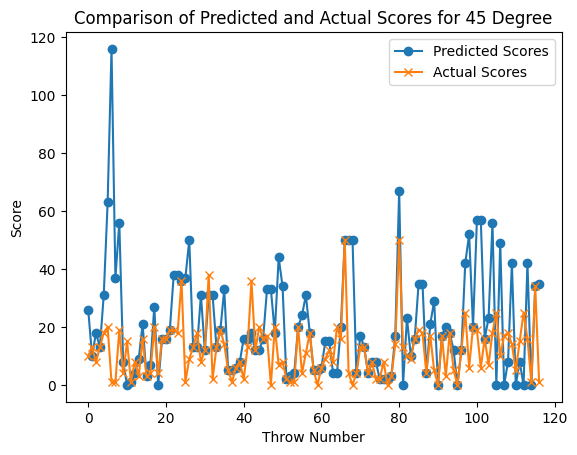

In [ ]:
plot_scores(predicted_scores=image_scores_45, actual_scores=scores_45)

In [ ]:
def compare_scores(predicted_scores, actual_scores):
    num_samples = min(len(predicted_scores), len(actual_scores))
    single_matches = double_matches = triple_matches = 0

    # Iterate through the scores in groups of three
    for i in range(0, num_samples, 3):
        pred_single, pred_double, pred_triple = predicted_scores[i:i+3]
        actual_single, actual_double, actual_triple = actual_scores[i:i+3]

        # Check if the predicted scores match the actual scores
        if pred_single == actual_single:
            single_matches += 1
        if pred_double == actual_double:
            double_matches += 1
        if pred_triple == actual_triple:
            triple_matches += 1

    # Calculate percentages
    single_percentage = (single_matches / num_samples) * 100
    double_percentage = (double_matches / num_samples) * 100
    triple_percentage = (triple_matches / num_samples) * 100

    return single_percentage, double_percentage, triple_percentage


In [ ]:
single_percentage_45, double_percentage_45, triple_percentage_45 = compare_scores(predicted_scores= image_scores_45, actual_scores=scores_45)
print("Percentage of matching single dart scores:", single_percentage_45, "%")
print("Percentage of matching double dart scores:", double_percentage_45, "%")
print("Percentage of matching triple dart scores:", triple_percentage_45, "%")

Percentage of matching single dart scores: 22.22222222222222 %
Percentage of matching double dart scores: 5.982905982905983 %
Percentage of matching triple dart scores: 4.273504273504273 %


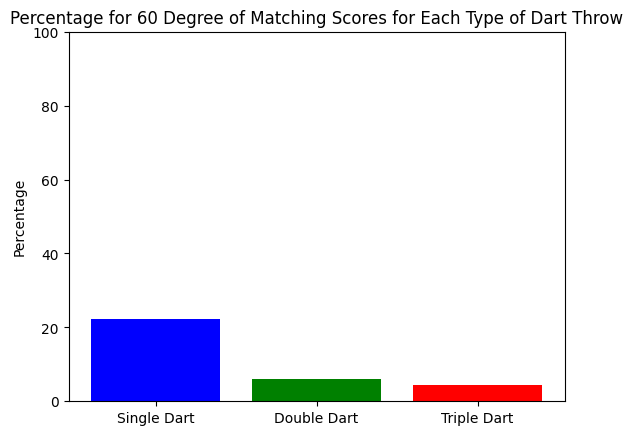

In [ ]:
# Plotting
labels = ['Single Dart', 'Double Dart', 'Triple Dart']
percentages = [single_percentage_45, double_percentage_45, triple_percentage_45]

plt.bar(labels, percentages, color=['blue', 'green', 'red'])
plt.title('Percentage for 60 Degree of Matching Scores for Each Type of Dart Throw')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()